<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/DT_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(42)

### 1. Load Dataset

* Load the prime_indians_diabetes dataset
* Check the first five samples. Are there any categorical features?
* Is this a classification or regression problem?
* Check the columns of the dataset

In [ ]:
df = pd.read_csv('/content/pima_indians_diabetes.csv')

In [ ]:
df.sample(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time_pregnant_no            768 non-null    int64  
 1   plasma_concentration        768 non-null    int64  
 2   diastolic_blood_pressure    768 non-null    int64  
 3   triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree           768 non-null    float64
 7   age                         768 non-null    int64  
 8   class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

In [ ]:
# There are no categorical features. This is a classification problem with class being the target variable

### 2. Data Preprocessing and Model

* Assign features to X and target variable to y
* Create a pipeline for preprocessing which includes imputing and standardscaling  
* Create a pipeline for preprocessor and the random forest classifier. Set n_estimators=100
* Train the model and make your predictions on the test dataset
* List the feature importance and the corresponding features
* Create a bar plot for the feature importances
* Drop the least important feature from the data and repeat the steps above

In [ ]:
X = df.drop('class', axis = 1)
y = df['class']

In [ ]:
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
                                        ('scaler', StandardScaler())])

In [ ]:
rfc_pipe = Pipeline(steps = [('transformer', numeric_transformer),
                             ('classifier', RandomForestClassifier(n_estimators = 100))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [ ]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pipe.score(X_train, y_train), rfc_pipe.score(X_test, y_test)

(1.0, 0.8051948051948052)

In [ ]:
y_pred = rfc_pipe.predict(X_test)

In [ ]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8051948051948052


In [ ]:
sort_indices = np.argsort(rfc_pipe.named_steps['classifier'].feature_importances_)[::-1]
sorted_features = X.columns[sort_indices]
sorted_feature_importances = rfc_pipe.named_steps['classifier'].feature_importances_[sort_indices]

/tmp/ipython-input-2540557918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted_features, y = sorted_feature_importances, palette = 'RdYlBu')


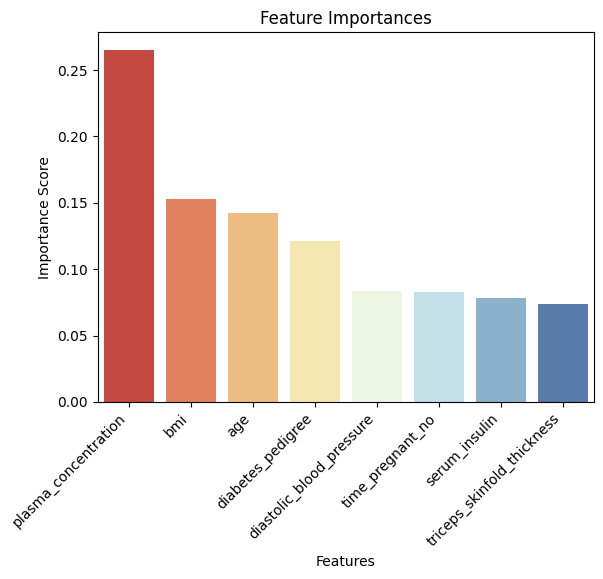

In [ ]:
sns.barplot(x = sorted_features, y = sorted_feature_importances, palette = 'RdYlBu')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

In [ ]:
features_importance_df = pd.DataFrame({'Feature': X.columns,
                                       'Importance': rfc_pipe.named_steps['classifier'].feature_importances_})
features_importance_df = features_importance_df.sort_values('Importance', ascending = False)

In [ ]:
features_importance_df

,Feature,Importance
1,plasma_concentration,0.265153
5,bmi,0.152950
7,age,0.142551
6,diabetes_pedigree,0.120932
2,diastolic_blood_pressure,0.083460
0,time_pregnant_no,0.082878
4,serum_insulin,0.078441
3,triceps_skinfold_thickness,0.073634


/tmp/ipython-input-3783544544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Feature', y = 'Importance', data = features_importance_df, palette = 'RdYlBu')


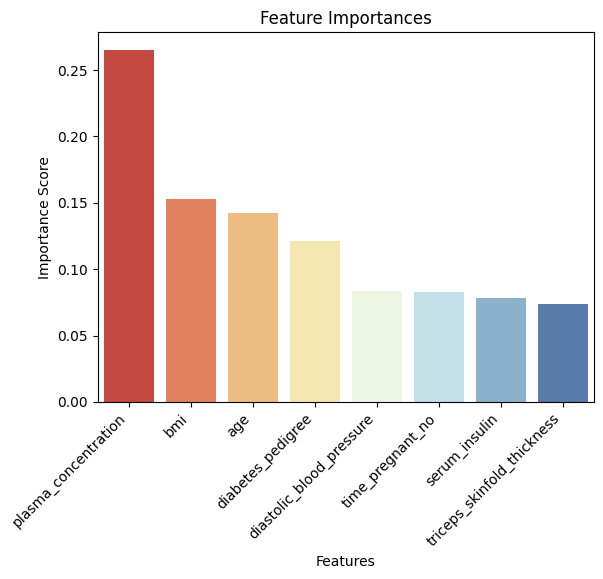

In [ ]:
sns.barplot(x = 'Feature', y = 'Importance', data = features_importance_df, palette = 'RdYlBu')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

In [ ]:
X = df.drop(['class', 'triceps_skinfold_thickness'], axis = 1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [ ]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pipe.score(X_train, y_train), rfc_pipe.score(X_test, y_test)

(1.0, 0.8311688311688312)

In [ ]:
y_pred = rfc_pipe.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8311688311688312